In [1]:
import numpy as np 
import pandas as pd 
import scanpy as sc 
import matplotlib.pyplot as plt 
import seaborn as sns 

/ihome/djishnu/alw399/.local/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
base_dir = '/ix/djishnu/shared/djishnu_kor11/training_data_2025/'
adata = sc.read_h5ad(base_dir + 'slideseq_mouse_lymphnode.h5ad')
adata

AnnData object with n_obs × n_vars = 22227 × 3128
    obs: 'cell_type', 'cell_type_int', 'celltype_label_tangram'
    uns: 'cell_thresholds', 'cell_type_colors', 'cell_type_int_colors', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_spatial', 'spatial', 'spatial_unscaled', 'tangram_ct_pred'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

### Run COVET

In [ ]:
import scenvi 

2025-06-01 14:12:28.606409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/crc/install/gcc-12.2.0/fftw/3.3.10/lib:/ihome/crc/install/gcc-12.2.0/glpk/5.0/lib:/ihome/crc/install/gcc-12.2.0/proj/4.9.3/lib:/ihome/crc/install/gcc-12.2.0/gdal/2.4.4/lib:/ihome/crc/install/gcc-12.2.0/netcdf/4.8.1/lib:/ihome/crc/install/gcc-12.2.0/hdf5/1.14.0/lib:/ihome/crc/install/gcc-12.2.0/jags/4.3.2/lib:/ihome/crc/install/gcc-12.2.0/gsl/2.7.1/lib:/ihome/c

In [5]:
adata.obsm['COVET'], adata.obsm['COVET_SQRT'], adata.uns['CovGenes'] = scenvi.compute_covet(adata)

In [ ]:
np.save('/ix/djishnu/shared/djishnu_kor11/covet_outputs/mouse_lymphnode_slideseq/COVET.npy', adata.obsm['COVET'])
np.save('/ix/djishnu/shared/djishnu_kor11/covet_outputs/mouse_lymphnode_slideseq/COVET_SQRT.npy', adata.obsm['COVET_SQRT'])
np.save('/ix/djishnu/shared/djishnu_kor11/covet_outputs/mouse_lymphnode_slideseq/CovGenes.npy', adata.uns['CovGenes'])

### Train COVET

In [3]:
import sys
sys.path.append('../../src')

from spaceoracle.tools.network import RegulatoryFactory
from spaceoracle.gene_factory import GeneFactory
from spaceoracle.astronomer import Astronaut

co_grn = RegulatoryFactory(
    colinks_path=base_dir + 'slideseq_mouse_lymphnode_colinks.pkl',
    annot='cell_type_int'
)

2025-06-03 13:48:59.338020: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/crc/install/gcc-12.2.0/fftw/3.3.10/lib:/ihome/crc/install/gcc-12.2.0/glpk/5.0/lib:/ihome/crc/install/gcc-12.2.0/proj/4.9.3/lib:/ihome/crc/install/gcc-12.2.0/gdal/2.4.4/lib:/ihome/crc/install/gcc-12.2.0/netcdf/4.8.1/lib:/ihome/crc/install/gcc-12.2.0/hdf5/1.14.0/lib:/ihome/crc/install/gcc-12.2.0/jags/4.3.2/lib:/ihome/crc/install/gcc-12.2.0/gsl/2.7.1/lib:/ihome/c

NameError: name 'sp_maps_key' is not defined

In [ ]:
sp_maps = np.load('/ix/djishnu/shared/djishnu_kor11/covet_outputs/mouse_lymphnode_slideseq/COVET.npy')
feature_key = 'COVET'
adata.obsm['COVET'] = sp_maps
adata

AnnData object with n_obs × n_vars = 22227 × 3128
    obs: 'cell_type', 'cell_type_int', 'celltype_label_tangram'
    uns: 'cell_thresholds', 'cell_type_colors', 'cell_type_int_colors', 'received_ligands', 'received_ligands_tfl'
    obsm: 'X_spatial', 'spatial', 'spatial_unscaled', 'tangram_ct_pred', 'COVET'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [ ]:
neil = Astronaut(
    adata=adata,
    # annot='cell_type_int', 
    max_epochs=200, 
    learning_rate=5e-3, 
    # spatial_dim=64,
    batch_size=512,
    grn=co_grn,
    radius=800,
    contact_distance=50,
    save_dir='/ix/djishnu/shared/djishnu_kor11/covet_runs/mouse_lymphnode_slideseq'
)


In [ ]:
neil.adata

AnnData object with n_obs × n_vars = 22227 × 3128
    obs: 'cell_type_int'
    obsm: 'X_spatial', 'spatial', 'spatial_unscaled', 'tangram_ct_pred', 'COVET'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [ ]:
neil.run(sp_maps_key='COVET')

Using COVET as spatial maps
Fitting Xlr4b with 229 modulators
	21 Transcription Factors
	174 Ligand-Receptor Pairs
	34 TranscriptionFactor-Ligand Pairs


KeyboardInterrupt: 

In [ ]:
gf = GeneFactory.from_json(
    adata=adata, 
    json_path=base_dir + 'covet_runs/mouse_lymphnode_slideseq' + '/run_params.json', 
)

gf.load_betas()

gf.genome_screen(
    save_to=base_dir + '/genome_screens/slideseq_mouse_lymphnode_COVET',
    n_propagation = 4,
    priority_genes = [
        'Il2', 'Il4',  'Il6st', 'Gzma', 'Il2ra', 
        'Cxcr4', 'Ccr4', 'Il4ra', 'Gata3', 'Gata2', 
        'Pax5', 'Stat4', 'Foxp3', 'Bcl6', 'Ccl20', 
        'Ccr7', 'Il21r', 'Il21', 'Ccl5'
    ]
)

### Compare transitions

In [3]:
import scanpy as sc
import os
import enlighten
import pandas as pd
import glob

import scanpy as sc 
import sys 
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import glob
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import random
warnings.filterwarnings('ignore')
sys.path.append('../../src')

2025-06-07 13:35:53.976446: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-07 13:35:54.693962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/

In [4]:
from spaceoracle.oracles import BaseTravLR
from spaceoracle.plotting.cartography import Cartography
from spaceoracle.virtual_tissue import VirtualTissue

In [5]:
covet_dir = '/ix/djishnu/shared/djishnu_kor11/genome_screens/mouse_lymphnode_slideseq_COVET/'
cnn_dir = '/ix/djishnu/shared/djishnu_kor11/genome_screens/slideseq_mouse_lymphnode/'

covet_betas = '/ix/djishnu/shared/djishnu_kor11/covet_runs/slideseq_mouse_lymphnode'
cnn_betas = '/ix/djishnu/shared/djishnu_kor11/lasso_runs/slideseq_mouse_lymphnode'

In [6]:
lymph = VirtualTissue(
    adata = adata,
    annot = 'cell_type',
    betadatas_path = covet_betas,
    ko_path = covet_dir
)

In [7]:
ligands = ['Il2', 'Il4', 'Ccl5', 'Il15', 'Cxcl13', 'Lgals9']
receptors = ['Il2ra', 'Ccr4', 'Il6st', 'Cxcr4', 'Il4ra', 'Cxcr5']
tfs = ['Gata3', 'Pax5', 'Bcl6', 'Prdm1', 'Foxp3', 'Stat4']
rand_tfs = ['Gata3', 'Cux2', 'Pten', 'Zkscan3', 'Fosl2', 'Tfcp2']

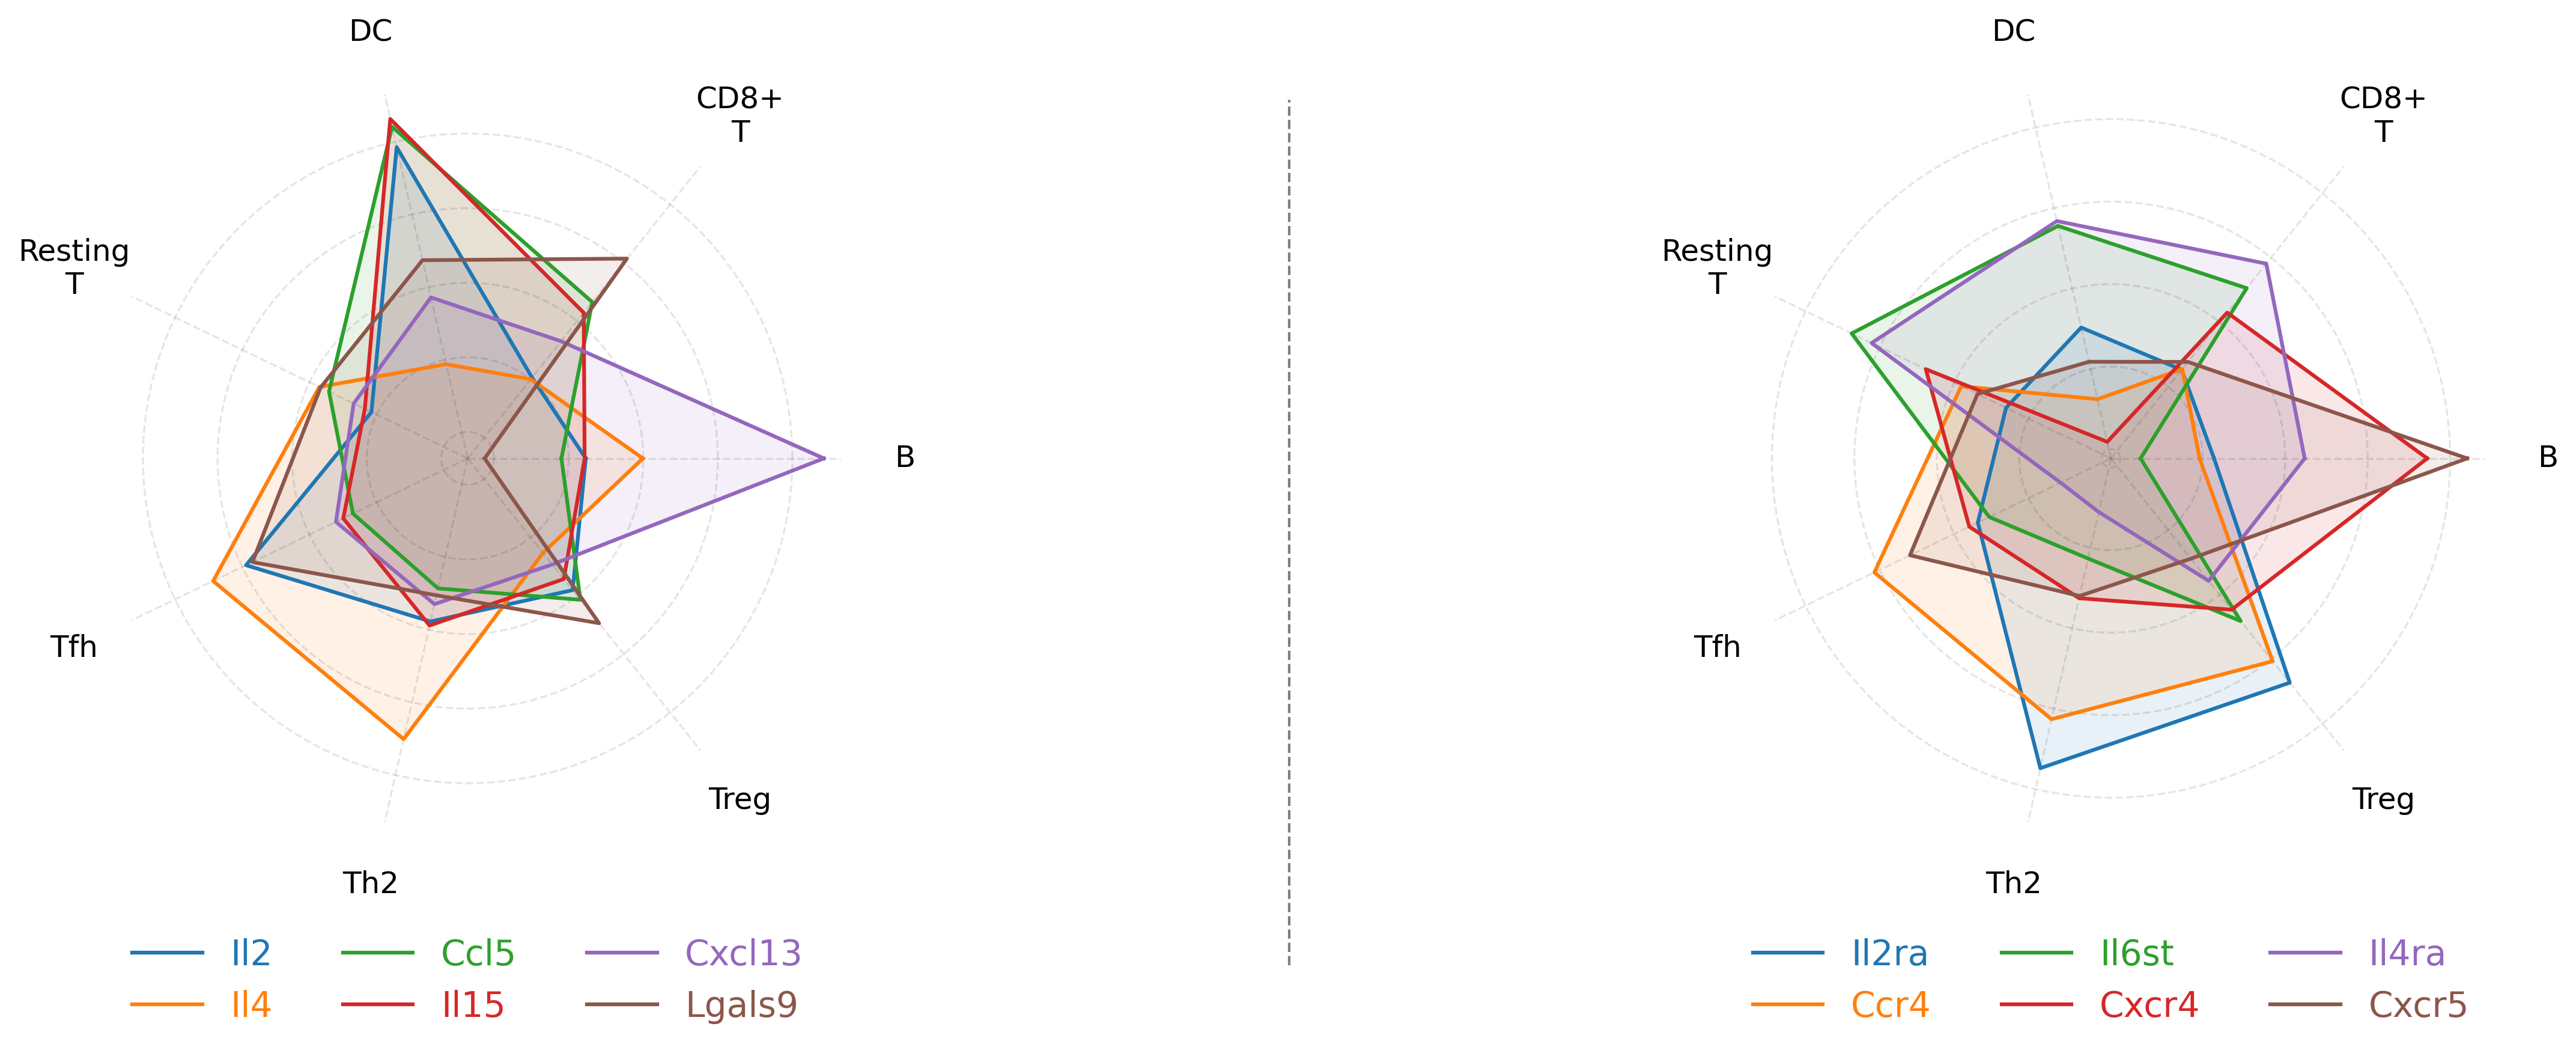

In [8]:
lymph.plot_radar(genes=[ligands, receptors], 
    show_for=sorted(adata.obs.cell_type.unique()))

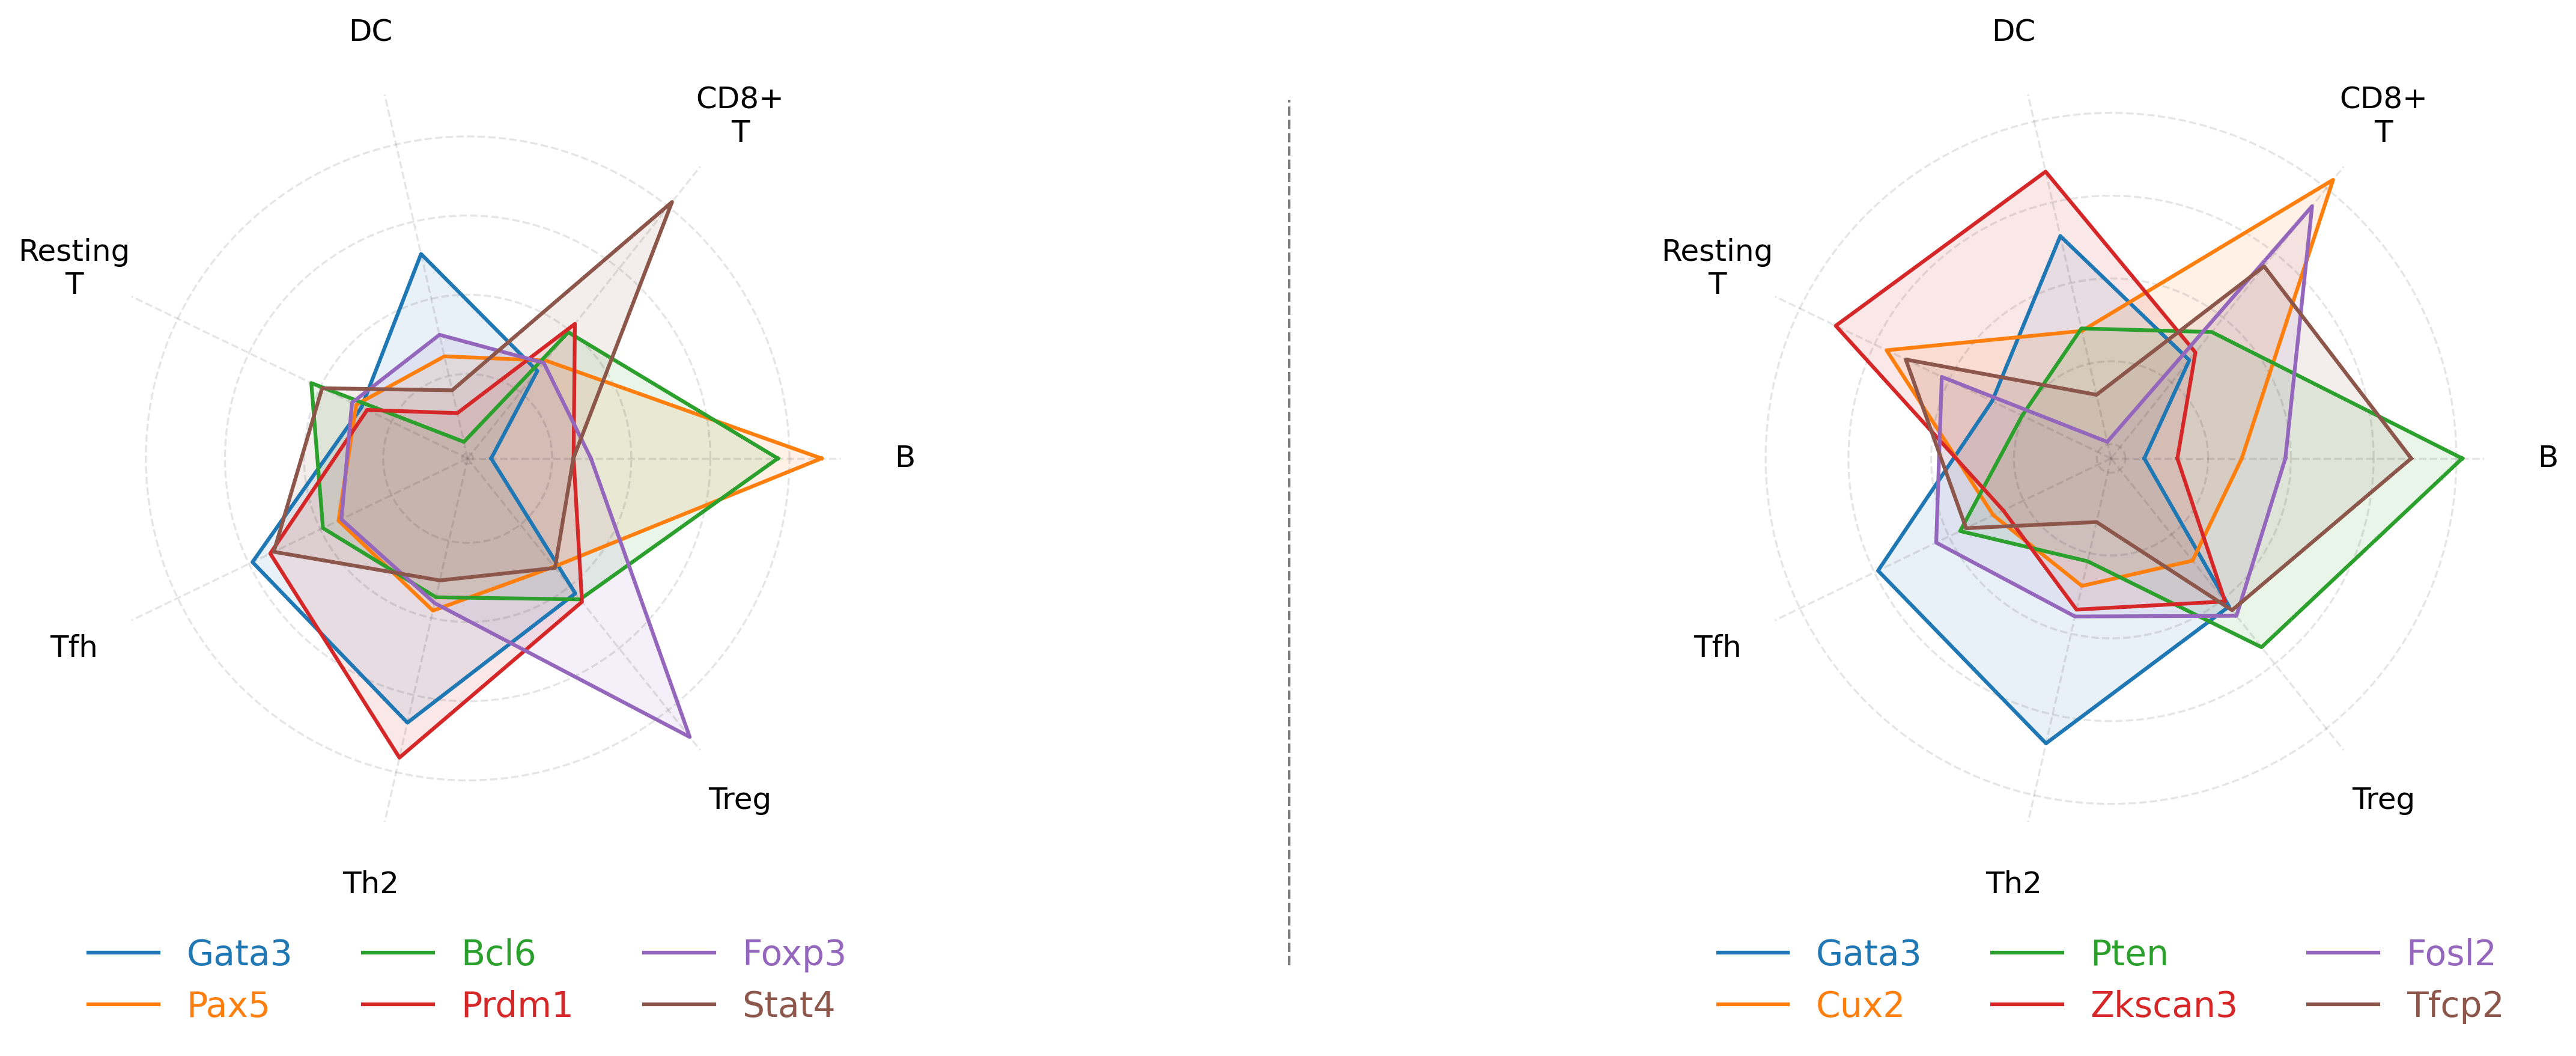

In [9]:
lymph.plot_radar(genes=[tfs, rand_tfs], 
    show_for=sorted(adata.obs.cell_type.unique()))

In [10]:
from scipy.stats import pearsonr
from spaceoracle.plotting.cartography import xy_from_adata
from spaceoracle.models.parallel_estimators import create_spatial_features

xy = xy_from_adata(adata)

spf = create_spatial_features(
    x=adata.obsm['spatial'][:, 0], 
    y=adata.obsm['spatial'][:, 1], 
    celltypes=adata.obs.cell_type, 
    obs_index=adata.obs_names
)


In [11]:

def plot_gene_vs_proximity(perturb_target, gene, color_gene, cell_filter, 
                          proximity_threshold=150, gene_threshold=0.005, ax=None, mode='ko'):
    perturbed_df = pd.read_parquet(
        f'/Volumes/SSD/genome_screens/human_tonsil/{perturb_target}_4n_maxx.parquet' if mode == 'maxx' else f'/Volumes/SSD/genome_screens/human_tonsil/{perturb_target}_4n_0x.parquet'
    )
    datadf = spf[
        [i+'_within' for i in cell_groups['T cells']
            ]].sum(1).to_frame().join(adata.obs.cell_type_2).query(
             f'cell_type_2.isin(["{cell_filter}"])').join(xy).join(
        ((perturbed_df-adata.to_df(layer='imputed_count'))/adata.to_df(layer='imputed_count'))*100
    )
    datadf = datadf[datadf[0] < proximity_threshold]
    
    if ax is None:
        ax = plt.gca()
    
    try:
        corr = pearsonr(datadf[datadf[gene]>gene_threshold][0], datadf[datadf[gene]>gene_threshold][gene]).statistic
        ax.set_title(f"{perturb_target} {mode.upper()} in\n{cell_filter}\nCorrelation: {corr:.4f}")
    except:
        corr = 0
        ax.set_title(f"{perturb_target} {mode.upper()} in\n{cell_filter}")
        
    scatter = ax.scatter(
        datadf[0], 
        datadf[gene], 
        c=datadf[color_gene],
        cmap='rainbow',
    )
    plt.colorbar(scatter, label=f'{color_gene} % change', shrink=0.75, ax=ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(f'{gene} % change')
    # ax.set_xlabel('Number of GC B cells within 200um')
    ax.set_xlabel('Number of T cells within 200um')
    
    
    return ax, datadf

In [ ]:
ax, datadf = plot_gene_vs_proximity(
    perturb_target='Ccr4', 
    gene='Gata3', 
    color_gene='', 
    # cell_filter='Naive CD4 T', 
    # cell_filter='T_follicular_helper', 
    # cell_filter='GC Dark Zone', 
    # mode='maxx'
    mode='ko'
    
)
plt.show()

In [4]:
color_dict = {
    'B': 'gray',
    'Resting T': 'gray',
    'Tfh': 'gray',
    'CD8+ T': 'gray',
    'Treg': 'gray',
    'Th2': 'gray',
    'DC': 'gray'
}

In [ ]:
from tqdm import tqdm
ko_data = []

files = rand_tfs

for kotarget in tqdm(files):
    data = pd.read_parquet(f'{covet_dir}/{kotarget}_4n_0x.parquet')
    data = data.loc[adata.obs_names] - adata.to_df(layer='imputed_count')
    data = data.join(adata.obs.cell_type).groupby('cell_type').mean().abs().mean(axis=1)

    ds = {}
    for k, v in data.sort_values(ascending=False).to_dict().items():
        ds[k] = v

    data = pd.DataFrame.from_dict(ds, orient='index')
    data.columns = [kotarget]
    ko_data.append(data)

In [ ]:
ko_concat = pd.concat(ko_data, axis=1)
ko_concat.head()

,Gata3,Cux2,Pten,Zkscan3,Fosl2,Tfcp2
Treg,0.000819,6.673407e-11,0.000075,0.000004,1.999125e-05,1.706035e-06
Th2,0.000671,5.508086e-11,0.000007,0.000005,9.700991e-06,5.495831e-11
Tfh,0.000456,6.011701e-11,0.000017,0.000004,9.299345e-06,6.891989e-07
DC,0.000414,7.712711e-12,0.000012,0.000007,5.042989e-11,8.293215e-12
B,0.000201,1.476407e-12,0.000024,0.000013,3.711420e-05,3.518607e-06


In [ ]:
from sklearn.preprocessing import StandardScaler

ko_concat_norm = pd.DataFrame(
    StandardScaler().fit_transform(ko_concat), 
    # ko_concat, 
    index=ko_concat.index, 
    columns=ko_concat.columns
)

Text(0.5, 1.0, 'Magnitude of KO effect (COVET betas)')

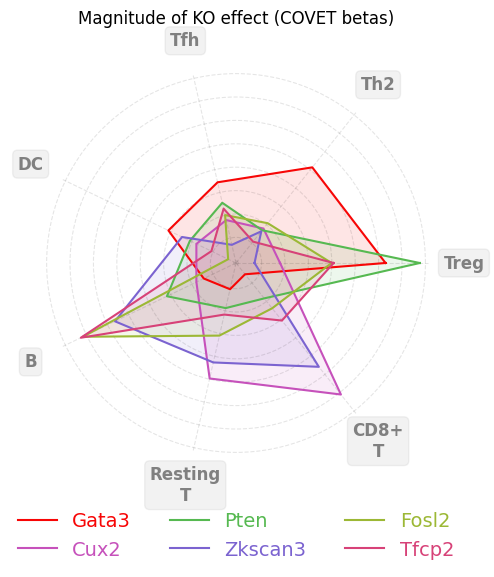

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, 
        figsize=(5, 5), dpi=100, 
        subplot_kw={'projection': 'polar'})
colors = ["#f70606",
"#c651bb",
"#56b951",
"#7b63d0",
"#9cb835",
"#d74278",
"#57be93",
"#cf4a35",
"#49b9d3",
"#e08830",
"#6481c6",
"#c9a841",
"#9b508b",
"#5b8225",
"#d68ecd",
"#3f7c4a",
"#b85865",
"#7c722c",
"#e49373",
"#9e622e"]
for i, col in enumerate(files):
    values = ko_concat_norm[col].values.tolist()
    values += values[:1]  # Repeat first value to close polygon
    
    angles = np.linspace(0, 2*np.pi, len(ko_concat_norm.index), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Repeat first angle to close polygon

    ax.plot(angles, values, '-', linewidth=1.5, 
            label=col, 
            color=colors[i]
        )
    ax.fill(angles, values, alpha=0.1, 
        edgecolor='black', 
        color=colors[i], 
        linewidth=0.5, hatch='')
    

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(
        ko_concat_norm.index.str.replace(' ', '\n'), size=12,
        fontweight='bold',
    )

    for t in ax.get_xticklabels():
        txt = t.get_text()
        t.set_color(color_dict[txt.replace('\n', ' ')])
        t.set_fontweight('bold')
        t.set_bbox(dict(boxstyle="round,pad=0.3", 
            fc=color_dict[txt.replace('\n', ' ')], ec="gray", alpha=0.1))
    ax.set_rlabel_position(0)
    ax.tick_params(pad=15)

    ax.grid(True, alpha=0.1, linestyle='--', color='black')
    ax.set_yticklabels(labels=ax.get_yticks(), size=5)

    ax.spines['polar'].set_visible(False)
    legend = ax.legend(bbox_to_anchor=(0.5, -0.1), 
        loc='upper center', ncol=3, frameon=False, fontsize=14)
    for text, line in zip(legend.get_texts(), legend.get_lines()):
        text.set_color(line.get_color())
    ax.set_rlabel_position(35)
    ax.set_yticklabels([])

plt.title('Magnitude of KO effect (COVET betas)')